# Bank Customers Clustering Analysis

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import date, timedelta


 ## Load data

In [2]:
dataset = pd.read_csv(r'bank_transactions.csv')
dataset.head()
#print(dataset)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


## Data cleaning

In [3]:
print(dataset['TransactionID'].unique())
print(dataset['TransactionID'].unique().size)
print(dataset['CustomerID'].unique())
print(dataset['CustomerID'].unique().size)

rows = len(dataset.axes[0])
cols = len(dataset.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

['T1' 'T2' 'T3' ... 'T1048565' 'T1048566' 'T1048567']
1048567
['C5841053' 'C2142763' 'C4417068' ... 'C8020229' 'C6459278' 'C6420483']
884265
Number of Rows:  1048567
Number of Columns:  9


In [4]:
all_types = dataset.dtypes
print(all_types)
print("-------------------------------")
print(dataset.isnull().sum())

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object
-------------------------------
TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


In [5]:
#Removing the T in the "TransactionID" field to get a column with unique integer values to use as dataframe indexes
#dataset['TransactionID'] = dataset['TransactionID'].replace({'T' : ''}, regex=True)
#dataset['TransactionID'] = dataset['TransactionID'].astype(int)
#dataset['TransactionID'].is_unique #True, so we use this field as index 

#dataset = dataset.set_index('TransactionID')
dataset.drop('TransactionID', inplace=True, axis=1) #used default indexes
dataset.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [6]:
print(dataset['CustLocation'].unique())
print(dataset['CustLocation'].unique().size)

['JAMSHEDPUR' 'JHAJJAR' 'MUMBAI' ... 'KARANJIA'
 'NR HERITAGE FRESH HYDERABAD' 'IMPERIA THANE WEST']
9356


In [7]:
dataset = dataset.dropna(subset = ['CustomerDOB','CustGender', 'CustLocation', 'CustAccountBalance'], how = 'any', inplace=False)
#print(dataset) # 1048567-6953 rows -> 1041614 rows

print("-------------------------------")
print(dataset.isnull().sum())  #check that there are no more null values

-------------------------------
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64


In [8]:
#count values in the column 'CustomerDOB'. There is a default date of birth when the real age is missing (1/1/1800).
print(dataset['CustomerDOB'].value_counts())

#we remove rows which contain this value
dataset = dataset.drop(dataset[dataset['CustomerDOB'] == '1/1/1800'].index,axis = 0)  

rows = len(dataset.axes[0])
cols = len(dataset.axes[1])

print("Number of Rows: ", rows) #985322 rows now
print("Number of Columns: ", cols)

1/1/1800    56292
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
2/12/51         1
20/3/52         1
26/9/47         1
4/10/41         1
24/10/44        1
Name: CustomerDOB, Length: 17233, dtype: int64
Number of Rows:  985322
Number of Columns:  8


In [9]:
dataset['TransactionDate'] = pd.to_datetime(dataset['TransactionDate']) #convert to datetime
dataset['CustomerDOB'] = pd.to_datetime(dataset['CustomerDOB']) #convert to datetime
dataset.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [10]:
print(dataset[dataset['TransactionDate'].dt.year!=2016]) #to verify that all transaction were made in 2016

Empty DataFrame
Columns: [CustomerID, CustomerDOB, CustGender, CustLocation, CustAccountBalance, TransactionDate, TransactionTime, TransactionAmount (INR)]
Index: []


In [11]:
#To solve ambiguity on dataset['CustomerDOB']
#remove 100 years where date is greater than date of the transaction
dataset['CustomerDOB'].mask(dataset['CustomerDOB'].dt.year >= dataset['TransactionDate'].dt.year, dataset['CustomerDOB'] - pd.DateOffset(years = 100) , inplace=True )

#remove 100 years if the person is less than 10 years old
dataset['CustomerDOB'].mask(dataset['TransactionDate'].dt.year - dataset['CustomerDOB'].dt.year < 10 , dataset['CustomerDOB'] - pd.DateOffset(years = 100) , inplace=True )


#create a CustomerAGE column in the dataset
dataset['CustomerAGE'] = dataset['TransactionDate']- dataset['CustomerDOB']
print(dataset['CustomerAGE'].dtype) #timedelta64[ns]

#to get only the year (as an integer number)
dataset['CustomerAGE'] = dataset['CustomerAGE'].astype('timedelta64[Y]').astype('int')
dataset.head()


timedelta64[ns]


,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAGE
0,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,21
1,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,58
2,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,19
3,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,42
4,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,27


In [12]:
filtered_data = dataset[(dataset['CustomerAGE'] < 16)] #to see how many people between 16 and 10 years are left (2000-2006)
print(filtered_data) #550 rows

#we consider that this is the real age because it is unlikely that they are more than 110 years old

        CustomerID CustomerDOB CustGender CustLocation  CustAccountBalance  \
485       C8013820  2004-12-07          F      CHENNAI             6661.03   
3696      C1934386  2002-09-12          M    NEW DELHI            51469.13   
5920      C7424249  2001-04-03          M    BANGALORE             4550.32   
6714      C7828452  2002-08-20          M     AMRITSAR             2458.12   
6966      C1911373  2000-11-04          M          PEN             2687.63   
...            ...         ...        ...          ...                 ...   
1044338   C6822618  2001-11-07          F        PATNA            92052.93   
1045058   C3422655  2001-11-07          F        PATNA            92052.93   
1045119   C8943140  2002-07-17          F         AGRA             9315.13   
1045629   C8010686  2005-08-15          F      GURGAON            43573.32   
1046676   C2722682  2001-11-07          F        PATNA            92052.93   

        TransactionDate  TransactionTime  TransactionAmount (IN

In [13]:
#to get hour/min/sec of the transaction
dataset['TransactionTime'] = dataset['TransactionTime'].apply(lambda x : datetime.datetime.fromtimestamp(int(x)).strftime('%H:%M:%S'))

In [14]:
all_types = dataset.dtypes
print(all_types) 
dataset.head()

CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionTime                    object
TransactionAmount (INR)           float64
CustomerAGE                         int32
dtype: object


,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAGE
0,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,16:46:47,25.0,21
1,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,16:24:18,27999.0,58
2,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,16:38:32,459.0,19
3,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,16:38:34,2060.0,42
4,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,03:19:16,1762.5,27


In [15]:
print(dataset.loc[42727])           

CustomerID                            C3340757
CustomerDOB                1991-12-11 00:00:00
CustGender                                   F
CustLocation                         NEW DELHI
CustAccountBalance                    14888.62
TransactionDate            2016-03-08 00:00:00
TransactionTime                       02:13:49
TransactionAmount (INR)                   95.0
CustomerAGE                                 24
Name: 42727, dtype: object


## Data visualizations

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')

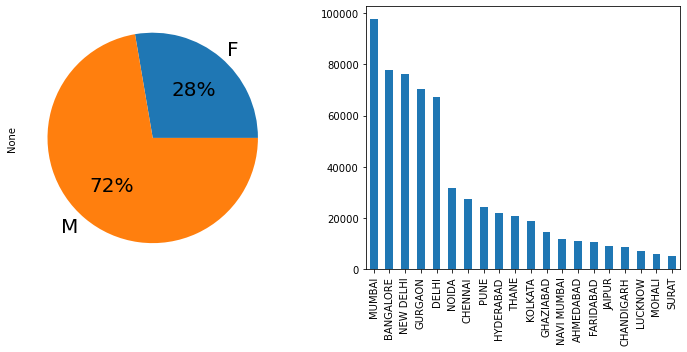

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

dataset.groupby('CustGender').size().plot(kind='pie',  autopct='%1.0f%%', textprops={'fontsize': 20}, ax=ax1)
dataset['CustLocation'].value_counts()[:20].plot(kind='bar', ax=ax2) #first 20 locations with the highest number of transactions

plt.tight_layout()
plt.show()

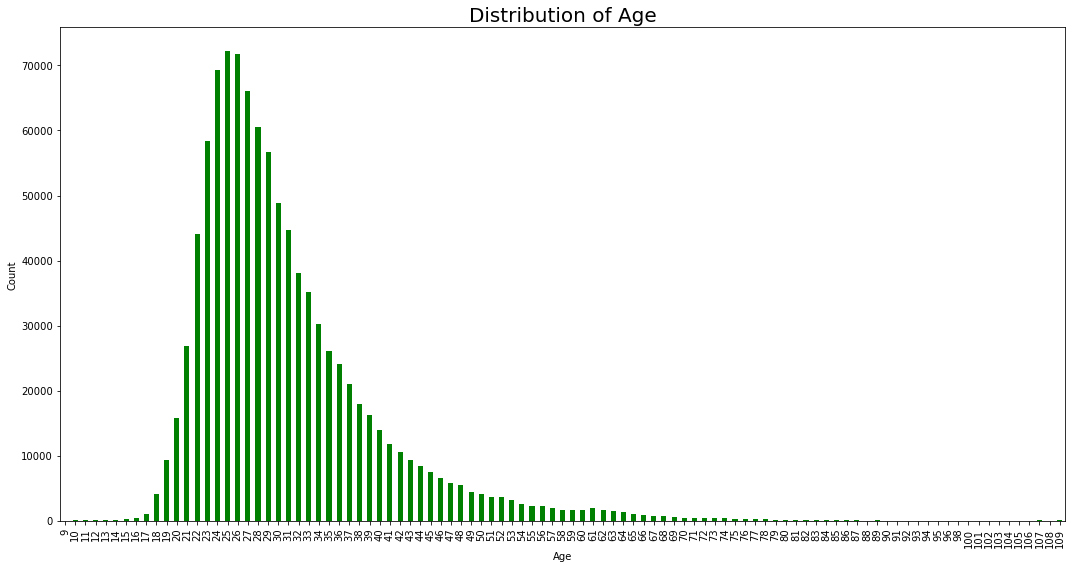

In [19]:
plt.figure(figsize=(15,8))

dataset.groupby('CustomerAGE').size().plot(kind='bar', color = 'green')
#sns.distplot(dataset['CustomerAGE'], color = 'green', kde=True)

plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



In [20]:
dataset['Month']= dataset['TransactionDate'].dt.month
dataset['Month'] = pd.to_numeric(dataset['Month'])
dataset.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAGE,Month
0,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,16:46:47,25.0,21,2
1,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,16:24:18,27999.0,58,2
2,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,16:38:32,459.0,19,2
3,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,16:38:34,2060.0,42,2
4,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,03:19:16,1762.5,27,2


Month
1      40232
2      41172
3      44376
4      44820
5      39914
6      43707
7      45926
8     402910
9     148810
10     48186
11     44769
12     40500
dtype: int64


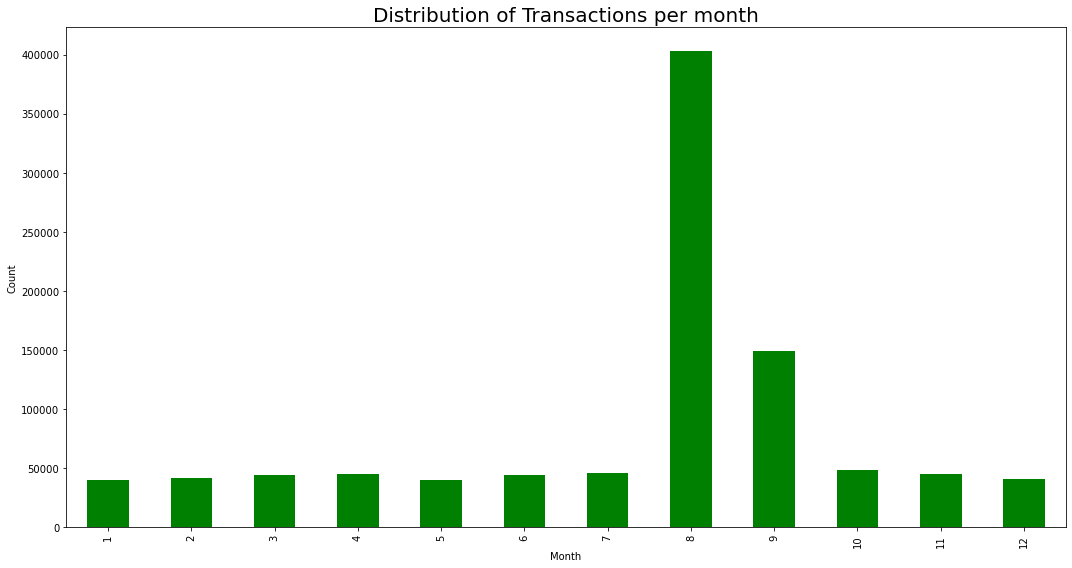

In [21]:
plt.figure(figsize=(15,8))

print(dataset.groupby('Month').size())
dataset.groupby('Month').size().plot(kind='bar', color = 'green')

plt.title('Distribution of Transactions per month', fontsize = 20)
plt.xlabel('Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [23]:
dataset['Hour'] = dataset['TransactionTime'].astype(str).str[:2]
dataset['Hour'] = pd.to_numeric(dataset['Hour'])
dataset.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAGE,Month,Hour
0,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,16:46:47,25.0,21,2,16
1,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,16:24:18,27999.0,58,2,16
2,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,16:38:32,459.0,19,2,16
3,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,16:38:34,2060.0,42,2,16
4,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,03:19:16,1762.5,27,2,3


Hour
0     42440
1     46798
2     23171
3     58012
4     41747
5     36186
6     66602
7     40276
8     55003
9     64196
10    36264
11    67796
12    45208
13    34029
14    58684
15    27812
16    41864
17    41016
18    24947
19    38202
20    15785
21    28727
22    37226
23    13331
dtype: int64


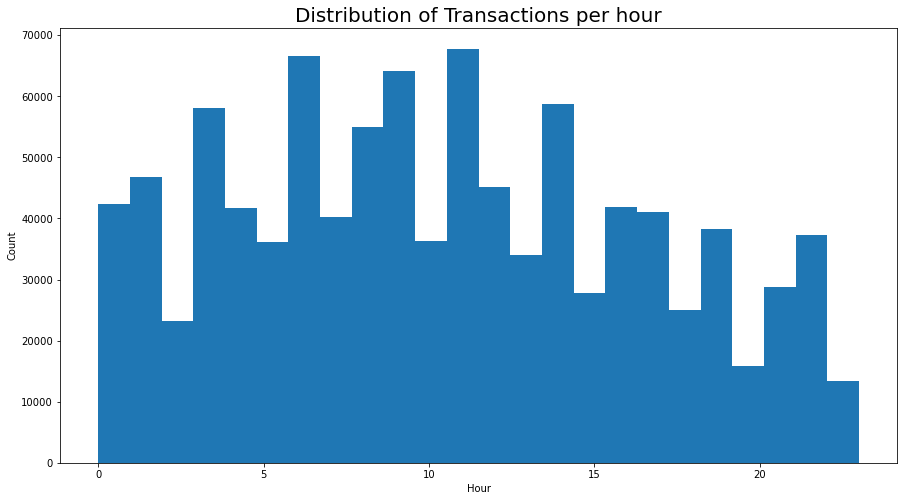

In [24]:
plt.figure(figsize=(15,8))

#sns.set(style = 'whitegrid')
#sns.distplot(dataset['Month'], color = 'green', kde=False)

print(dataset.groupby('Hour').size())
#dataset.groupby('Hour').size().plot(kind='bar', color = 'green')


plt.hist(dataset['Hour'], bins=24)
plt.title('Distribution of Transactions per hour', fontsize = 20)
plt.xlabel('Hour')
plt.ylabel('Count')


plt.show()

In [25]:
dataset["CustGender"] = dataset["CustGender"].apply(lambda x: 1 if x == "F" else 0) #to get numeric values from CustGender column
dataset.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAGE,Month,Hour
0,C5841053,1994-10-01,1,JAMSHEDPUR,17819.05,2016-02-08,16:46:47,25.0,21,2,16
1,C2142763,1957-04-04,0,JHAJJAR,2270.69,2016-02-08,16:24:18,27999.0,58,2,16
2,C4417068,1996-11-26,1,MUMBAI,17874.44,2016-02-08,16:38:32,459.0,19,2,16
3,C5342380,1973-09-14,1,MUMBAI,866503.21,2016-02-08,16:38:34,2060.0,42,2,16
4,C9031234,1988-03-24,1,NAVI MUMBAI,6714.43,2016-02-08,03:19:16,1762.5,27,2,3


In [26]:
dataset.drop(["CustomerID","CustomerDOB","CustLocation","TransactionDate","TransactionTime", "Month", "Hour"], axis=1, inplace=True)
dataset.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAGE
0,1,17819.05,25.0,21
1,0,2270.69,27999.0,58
2,1,17874.44,459.0,19
3,1,866503.21,2060.0,42
4,1,6714.43,1762.5,27


In [28]:
#sns.pairplot(dataset)

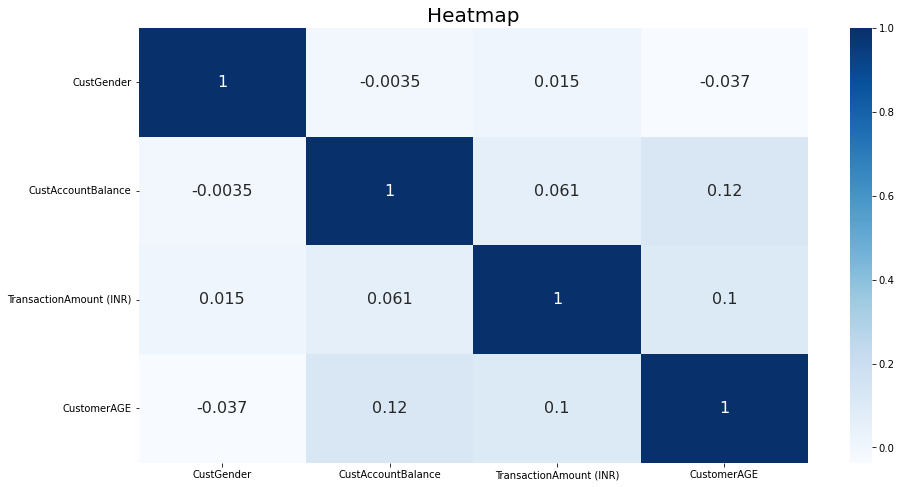

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('Heatmap', fontsize = 20)
plt.show()

In [31]:
dataset_clustering = dataset.filter(['CustomerAGE', 'TransactionAmount (INR)'], axis=1)
dataset_clustering.head()

,CustomerAGE,TransactionAmount (INR)
0,21,25.0
1,58,27999.0
2,19,459.0
3,42,2060.0
4,27,1762.5


In [32]:
data = dataset_clustering.iloc[:, [0, 1]].values

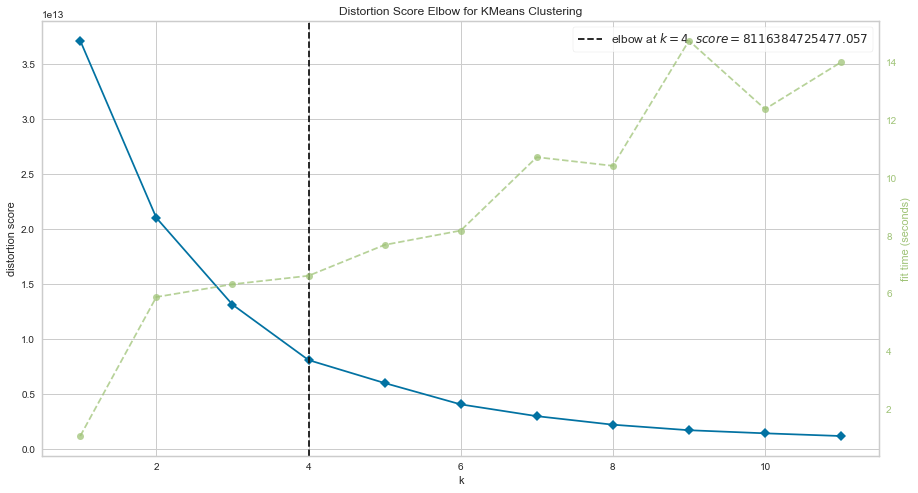

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from sklearn.cluster import KMeans

#wcss = []
#for i in range(1, 11):
#    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
#    km.fit(data)
#    wcss.append(km.inertia_)

#plt.figure(figsize=(20,8))
#plt.plot(range(1, 11), wcss)
#plt.title('The Elbow Method', fontsize = 20)
#plt.xlabel('No. of Clusters')
#plt.ylabel('wcss')

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

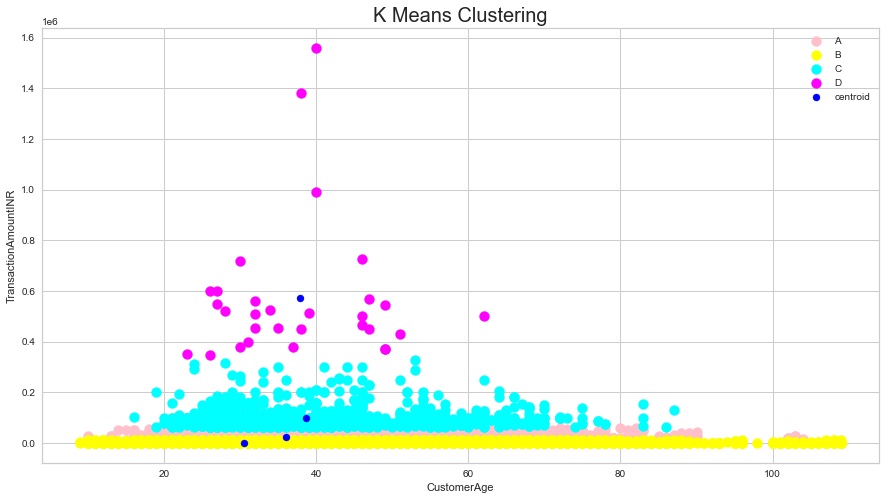

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver="auto").fit(data)
pca_data = pca.transform(data)


#4 = n° di cluster
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(data)

plt.figure(figsize=(15,8))
plt.scatter(data[y_means == 0, 0], data[y_means == 0, 1], s = 100, c = 'pink', label = 'A')
plt.scatter(data[y_means == 1, 0], data[y_means == 1, 1], s = 100, c = 'yellow', label = 'B')
plt.scatter(data[y_means == 2, 0], data[y_means == 2, 1], s = 100, c = 'cyan', label = 'C')
plt.scatter(data[y_means == 3, 0], data[y_means == 3, 1], s = 100, c = 'magenta', label = 'D')
#plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'E')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('CustomerAge')
plt.ylabel('TransactionAmountINR')

plt.legend()
plt.show()

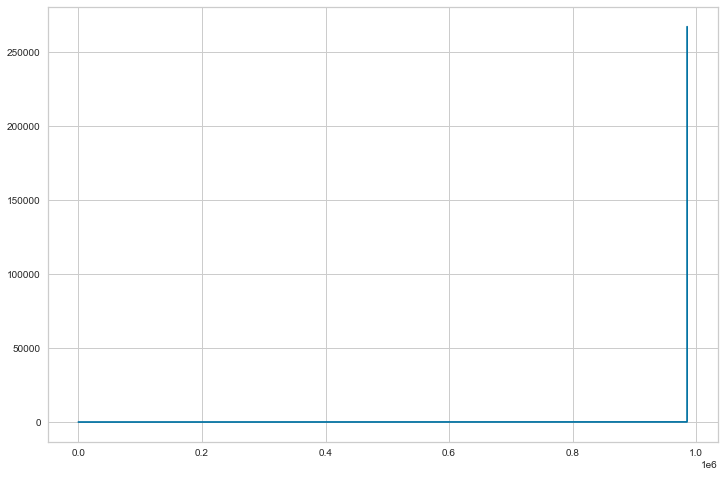

In [35]:
from sklearn.neighbors import NearestNeighbors
import numpy as np


neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])

In [ ]:
#from sklearn.cluster import DBSCAN

#db = DBSCAN(eps=1, min_samples=5).fit(data)
#ymeans = db.labels_
#ymeans